In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, plot_confusion_matrix


# Load data
data = pd.read_csv('heart_attack\heart.csv')
data['max_attack'] = 220
data['precis_of_beats'] = (data['age']+data['thalachh'])/data['max_attack']
# remove duplicates
data = data.drop_duplicates()





In [10]:
data.drop(['max_attack'], axis=1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,precis_of_beats
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.968182
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1.018182
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.968182
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1.063636
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0.818182
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0.804545
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0.950000
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0.781818


In [11]:
X = data.drop(columns='output')
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)



In [12]:
# Preprocessor
num_var = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak','precis_of_beats']
cat_var = [col for col in X_train.columns if col not in num_var]

num_prep = ColumnTransformer([('num_prepo', StandardScaler(), num_var)],
                             remainder='passthrough')



accuracy_score: 0.89


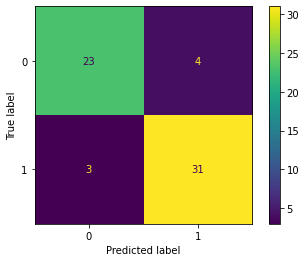

In [13]:
# Model
rf = RandomForestClassifier(random_state=0, max_depth=4, n_estimators=200)

# Model pipeline
rf_pipe = Pipeline([('prep', num_prep), ('rf', rf)])

# Fit
rf_pipe_fitted = rf_pipe.fit(X_train, y_train)

# Performance (initial score is 0.89)
pred = rf_pipe_fitted.predict(X_test)

print(f'accuracy_score: {round(accuracy_score(y_test, pred), 2) }')

# Confusion matrix
plot_confusion_matrix(rf_pipe, X_test, y_test)
plt.show()